In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

In [24]:
medical_df = pd.read_csv('insurance.csv')

In [25]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# EDA

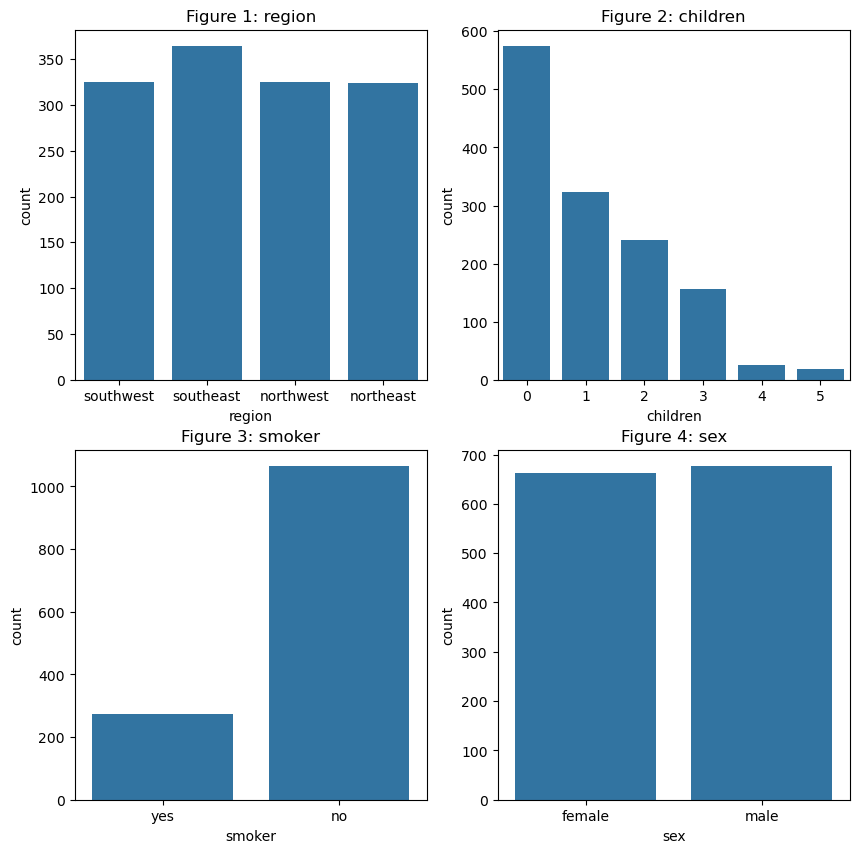

In [29]:
cols = ['region', 'children', 'smoker', 'sex' ]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows,n_cols, figsize=(10,10))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = medical_df, x= cols[i], ax = ax_i )
            ax_i.set_title(f"Figure {i+1}: {cols[i]}")

<Axes: xlabel='age', ylabel='Count'>

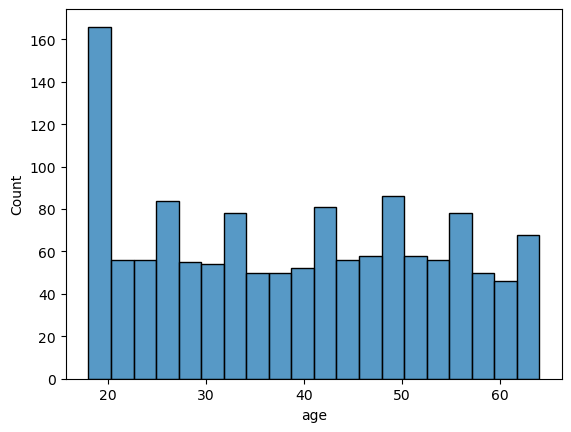

In [30]:
sns.histplot(data = medical_df, x= 'age', bins =20 )

# Data preprocessing


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
features = ['sex', 'region', 'smoker']
for feature in features:
    le = LabelEncoder()
    medical_df[feature] = le.fit_transform(medical_df[feature])

In [90]:
medical_df[features].head()

,sex,region,smoker
0,0,3,1
1,1,2,0
2,1,2,0
3,1,1,0
4,1,1,0


# Train test split 

In [40]:
X = medical_df.drop(['charges'], axis=1)
y = medical_df['charges']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build model

In [63]:
log_reg = LinearRegression()

In [64]:
log_reg.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [65]:
y_pred_train = log_reg.predict(X_train)
train_r2 = r2_score(y_pred_train,y_train)
print('R squared vale', train_r2)

R squared vale 0.642835993784495


In [66]:
y_pred_test = log_reg.predict(X_test)
test_r2 = r2_score(y_pred_test,y_test)
print('R squared vale', test_r2)

R squared vale 0.7245405921827409


In [68]:
y_test = np.asarray(y_test)

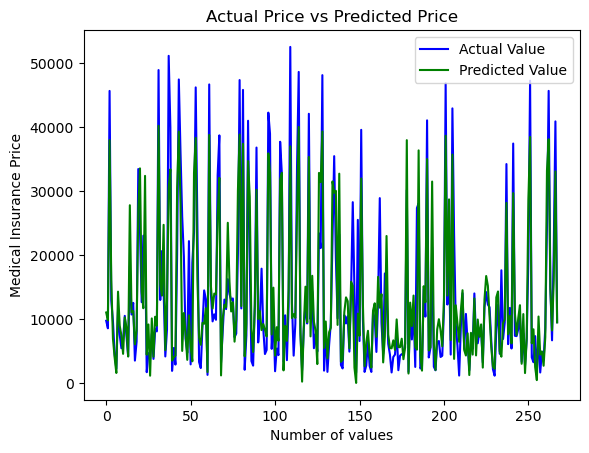

In [69]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(y_pred_test, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Medical Insurance Price')
plt.legend()
plt.show()

In [82]:
from sklearn.ensemble import RandomForestRegressor 
model =RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
y_pred_train = model.predict(X_train)
train_r2 = r2_score(y_pred_train,y_train)
print('R squared vale', train_r2)

R squared vale 0.9709837798150969


In [84]:
y_pred_test = model.predict(X_test)
test_r2 = r2_score(y_pred_test,y_test)
print('R squared vale', test_r2)

R squared vale 0.8701988899201508


In [86]:
y_test = np.asarray(y_test)

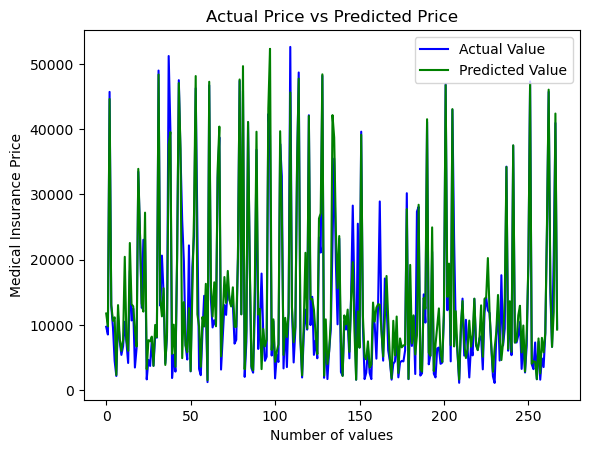

In [87]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(y_pred_test, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Medical Insurance Price')
plt.legend()
plt.show()

In [91]:
medical_df['region'].value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [106]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Dữ liệu đầu vào
input_data = (62,1,26.695,0,1,1)

# Chuyển thành DataFrame với tên cột giống khi train
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Dự đoán
prediction = model.predict(input_data_df)
print(prediction)

[28369.648566]
